<a href="https://colab.research.google.com/github/FranciscoFoz/Projeto_Modulo3_Bootcamp_Data_Science_Alura_2021/blob/main/Previsao_casos_COVID_19_Parte_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= MediumSpringGreen		size = 6> Projeto Módulo 3 
 Previsão dos casos de COVID-19 no Brasil: </font>
# <font color= MediumSpringGreen		size = 5> 
Uma análise preditiva no município com maior índice de casos por habitante </font>


---




# <font color= MediumSpringGreen		size = 4> Parte 3 - Visualização </font> 

Elaborado por [Francisco Foz](https://www.linkedin.com/in/francisco-tadeu-foz/)

Data: 19/12/2021

Durante o terceiro módulo do bootcamp Data Science 2021 da Alura, podemos estudar séries temporais e conhecer a biblioteca [Facebook Prophet](https://facebook.github.io/prophet/). 

Neste projeto utilizarei das técnicas estudadas para análisar os dados dos boletins epidemiológicos da COVID-19 no Brasil extraídos do [Brasil.io](https://brasil.io/dataset/covid19/) (última atualização: 17 de dezembro de 2021, acesso em 18 de dezembro de 2021).


Você pode encontrar o dataset baixado por mim neste [link](https://drive.google.com/file/d/1cosY6p83n_88hJv9I51oQjcS_I1z0Utw/view?usp=sharing).

---




## Projeto

Esta análise pretende explorar os dados dos casos de COVID-19 dos estados e municípios no Brasil, no período de entre 2020-2021. Realizar uma análise preditiva dos casos, no município que tive ro maior número de casos acumulados por habitante.

Para se delimitar o estudo, buscarei entender qual foi o **estado com maior quantidade de casos por habitante** e dentre este estado qual foi o **município com maior quantidade de casos por habitante**.

A partir deste cenário realizarei os estudos de previsão no município utilizando o **Facebook Prophet**.


Responderei os seguintes questionamentos:

*    Qual foi o estado com maior índice de casos de COVID-19 por habitante?
*    Qual foi o município com maior índice de casos de COVID-19 por habitante?
*    Dentre o estado encontrado, qual foi o município com maior índice de casos de COVID-19 por habitante? 
*    Quais são os números previstos para os próximos 30 dias no município selecionado? 



O projeto foi dividido em três notebooks: 
*    [Parte 1: Manipulação de dados](https://colab.research.google.com/drive/1SALaMotX8eYA671Spf_PEw3ixuIdsxIU?usp=sharing)
*    [Parte 2: Previsão de dados](https://colab.research.google.com/drive/1Y_V5SWMYd-kBGIl6WbmoQn1zs2A5-9BL?usp=sharing)
*    Parte 3: Visualização de dados


### <font color= MediumSpringGreen> Bibliotecas utilizadas 

*    Pandas
*    Matplotlib (V. 3.4.2)
*    Numpy
*    Seaborn
*    Datetime
*    FB Prophet
*    Scikit-learn


In [36]:
!pip install matplotlib==3.4.2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import matplotlib.dates as mdates
import numpy as np 
import seaborn as sns
import datetime
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error

### <font color= MediumSpringGreen	> Importando dados <font>

In [ ]:
estados = pd.read_csv('https://github.com/FranciscoFoz/Projeto_Modulo3_Bootcamp_Data_Science_Alura_2021/raw/main/Datasets/estados_dez_2021_5_primeiros.csv')
municipios_brasil = pd.read_csv('https://github.com/FranciscoFoz/Projeto_Modulo3_Bootcamp_Data_Science_Alura_2021/raw/main/Datasets/municipio_dez_2021_10_primeiros.csv')
municipios_roraima = pd.read_csv('https://github.com/FranciscoFoz/Projeto_Modulo3_Bootcamp_Data_Science_Alura_2021/raw/main/Datasets/municipio_RR_dez_2021_5_primeiros.csv')
casos_BoaVista = pd.read_csv('https://github.com/FranciscoFoz/Projeto_Modulo3_Bootcamp_Data_Science_Alura_2021/raw/main/Datasets/casos_covid_BoaVista.csv')
sem_outliers = pd.read_csv('https://github.com/FranciscoFoz/Projeto_Modulo3_Bootcamp_Data_Science_Alura_2021/raw/main/Datasets/dados_previsao.csv')
feriados_RR = pd.read_csv('https://github.com/FranciscoFoz/Projeto_Modulo3_Bootcamp_Data_Science_Alura_2021/raw/main/Datasets/feriados_RR.csv')
df_teste = pd.read_csv('https://github.com/FranciscoFoz/Projeto_Modulo3_Bootcamp_Data_Science_Alura_2021/raw/main/Datasets/df_teste.csv')

### <font color= MediumSpringGreen> 1. Estados: casos por habitante

Irei visualizar os dados da quantidade de casos por habitante.

In [ ]:
estados.set_index('estado',inplace=True)

In [ ]:
estados = estados['casos_confirmados_acumulados_por_100k_habitantes']

In [ ]:
def grafico_estado():

  plt.figure(facecolor='white')                                                  #Escolhendo a cor do fundo

  g = estados.plot(kind='barh',                                                  #Criar gráfico
                  color=['gray']*4 +['#BC1400'],                                 #Escolher cores das barras
                  figsize=(16,8),                                                #Escolher tamanho da figura
                  ylabel=False,                                                  #Excluir rótulo do eixo y
                  legend=None)                                             

  for rotulo in g.containers:                                                    #Criar rótulo de dados nas barras
      g.bar_label(rotulo,fontsize=15)

  
                        
  plt.xticks([])                                                                 #Excluir valores do eixo x
  plt.yticks(fontsize=15)                                                        #Aumentar a fonte do eixo y
  plt.ylabel(None)                                                               #Excluir rótulo do eixo y


  plt.title('Quantidade de casos de COVID-19 por 100k habitantes' + '\n',        #Colocar o título
            fontsize=30,                                                         #Tamanho do texto
            loc='left',                                                          #Ajustar do lado esquerdo
            color='dimgrey')                                                     #Escolher a cor

  plt.text(0,4.2,                                                                #Escolher a posição x e y
          '5 estados com maior quantidade desde 03/2020 a 12/2021'+'\n',         #Plotar o texto 
          fontsize = 20,                                                         #Ajustar o tamanho da fonte
          color='gray')                                                          #Ajustar a cor
                        
  plt.text(16000,-0.4,                                                           #Escolher a posição x e y e escrever o texto
          '''
          O estado de $\\bf{Roraima}$ 
          teve a maior quantidade 
          dentre os estados do país
          ''',
          fontsize = 20,                                                         #Ajustar o tamanho da fonte
          color='#BC1400')                                                       #Ajustar a cor
plt.show()

### <font color= MediumSpringGreen> 1.1 Visualização

Irei visualizar os dados da quantidade de casos por habitante.

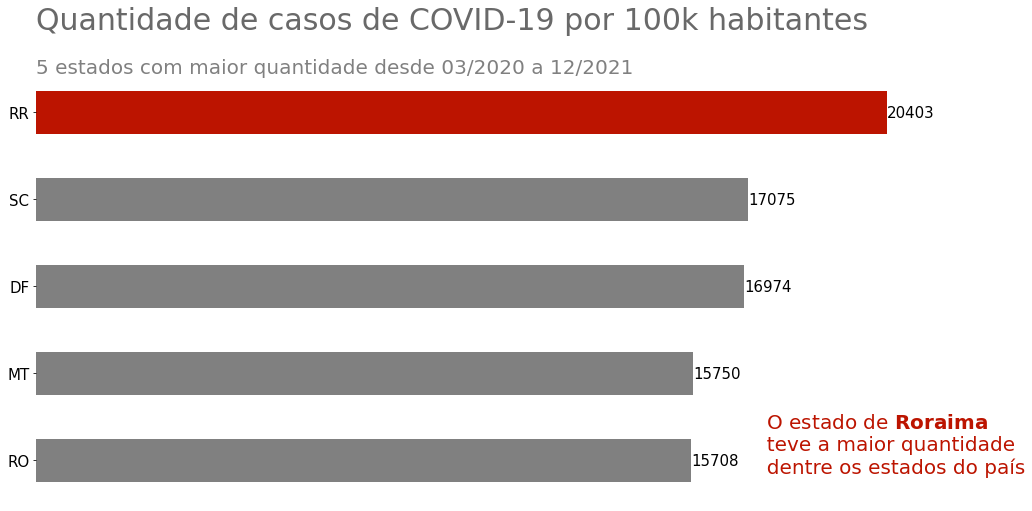

In [ ]:
grafico_estado()

### <font color= MediumSpringGreen> 2. Municípios: casos por habitante

Irei visualizar os dados da quantidade de casos por habitante.

### <font color= MediumSpringGreen> 2.1 Municípios do Brasil


In [ ]:
municipios_brasil.set_index('municipio',inplace=True)                           #Criando índice

In [ ]:
municipios_brasil = municipios_brasil['casos_confirmados_acumulados_por_100k_habitantes']         #Criando series

In [ ]:
def grafico_municipios_brasil():
  plt.figure(facecolor='white')                                                  #Escolhendo a cor do fundo

  g = municipios_brasil.plot(kind='barh',                                        #Criar gráfico
                  color=['gray']*9 +['#BC1400'],                                 #Escolher cores das barras
                  figsize=(16,8),                                                #Escolher tamanho da figura
                  ylabel=False,                                                  #Excluir rótulo do eixo y
                  legend=None)                                             

  for rotulo in g.containers:                                                    #Criar rótulo de dados nas barras
      g.bar_label(rotulo,fontsize=15)

  for spine in plt.gca().spines.values():                                        #Remover os eixos do gráfico
      spine.set_visible(False)
                        
  plt.xticks([])                                                                 #Excluir valores do eixo x
  plt.yticks(fontsize=15)                                                        #Aumentar a fonte do eixo y
  plt.ylabel(None)                                                               #Excluir rótulo do eixo y


  plt.title('Quantidade de casos de COVID-19 por 100k habitantes' + '\n',        #Colocar o título
            fontsize=30,                                                         #Tamanho do texto
            loc='left',                                                          #Ajustar do lado esquerdo
            color='dimgrey')                                                     #Escolher a cor

  plt.text(0,9.2,                                                                #Escolher a posição x e y
          '10 municipios com maior quantidade desde 03/2020 a 12/2021'+'\n',     #Plotar o texto 
          fontsize = 20,                                                         #Ajustar o tamanho da fonte
          color='gray')                                                          #Ajustar a cor
                        
  plt.text(32000,-0.5,                                                           #Escolher a posição x e y e escrever o texto
          '''
          O municipio de $\\bf{Porteirão-GO}$ teve a maior
          quantidade dentre os municípios do país.
          $\\bf{Nenhum \\ município \\ foi \\ do \\ estado \\ de \\ Roraima}$.
          ''',
          fontsize = 20,                                                         #Ajustar o tamanho da fonte
          color='#BC1400')                                                       #Ajustar a cor
  plt.show()

### <font color= MediumSpringGreen> 2.1.1 Visualização

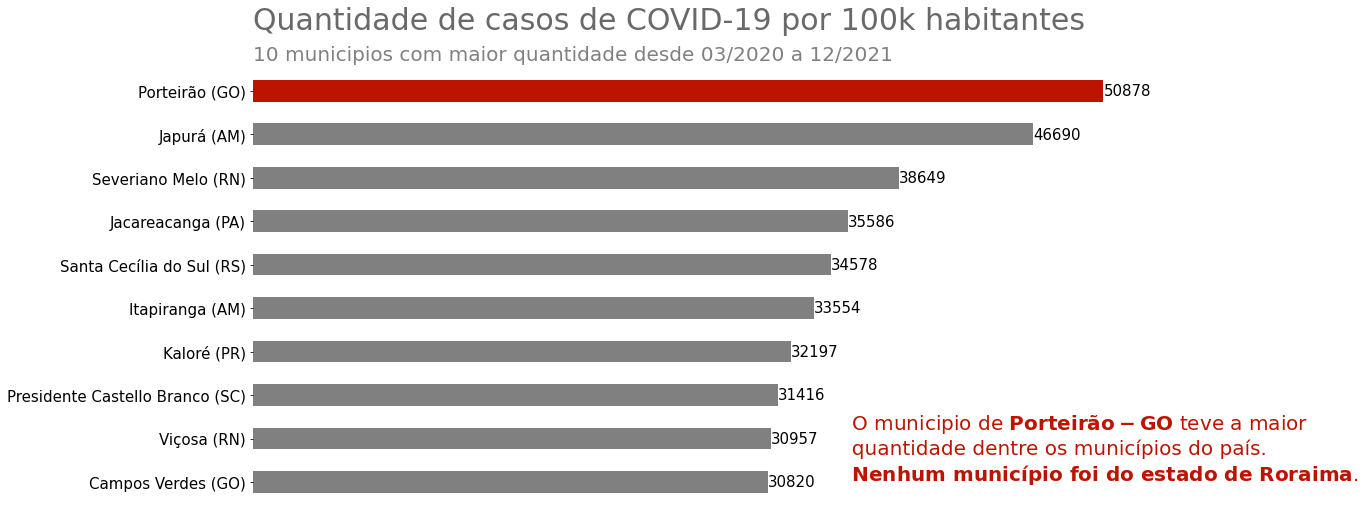

In [ ]:
grafico_municipios_brasil()

### <font color= MediumSpringGreen> 2.2 Municípios de Roraima

In [ ]:
municipios_roraima.set_index('municipio',inplace=True)                          #Criando índice

In [ ]:
municipios_roraima = municipios_roraima['casos_confirmados_acumulados_por_100k_habitantes']         #Criando series

In [ ]:
def grafico_municipio_roraima():
  plt.figure(facecolor='white')                                                  #Escolhendo a cor do fundo

  g = municipios_roraima.plot(kind='barh',                                       #Criar gráfico
                  color=['gray']*4 +['#BC1400'],                                 #Escolher cores das barras
                  figsize=(16,8),                                                #Escolher tamanho da figura
                  ylabel=False,                                                  #Excluir rótulo do eixo y
                  legend=None)                                             

  for rotulo in g.containers:                                                    #Criar rótulo de dados nas barras
      g.bar_label(rotulo,fontsize=15)

  for spine in plt.gca().spines.values():                                        #Remover os eixos do gráfico
      spine.set_visible(False)
                        
  plt.xticks([])                                                                 #Excluir valores do eixo x
  plt.yticks(fontsize=15)                                                        #Aumentar a fonte do eixo y
  plt.ylabel(None)                                                               #Excluir rótulo do eixo y


  plt.title('Quantidade de casos de COVID-19 por 100k habitantes' + '\n',        #Colocar o título
            fontsize=30,                                                         #Tamanho do texto
            loc='left',                                                          #Ajustar do lado esquerdo
            color='dimgrey')                                                     #Escolher a cor

  plt.text(0,4.2,                                                                #Escolher a posição x e y
          '5 municipios de $\\bf{Roraima}$ com maior quantidade desde 03/2020 a 12/2021'
          +'\n',     #Plotar o texto 
          fontsize = 20,                                                         #Ajustar o tamanho da fonte
          color='gray')                                                          #Ajustar a cor
                        
  plt.text(19000,-0.4,                                                           #Escolher a posição x e y e escrever o texto
          '''
          O municipio de $\\bf{Boa \\ Vista}$ teve
          a maior quantidade dentre os 
          municípios de Roraima.
          ''',
          fontsize = 20,                                                         #Ajustar o tamanho da fonte
          color='#BC1400')                                                       #Ajustar a cor
          
  plt.show()

### <font color= MediumSpringGreen> 2.2.1 Visualização

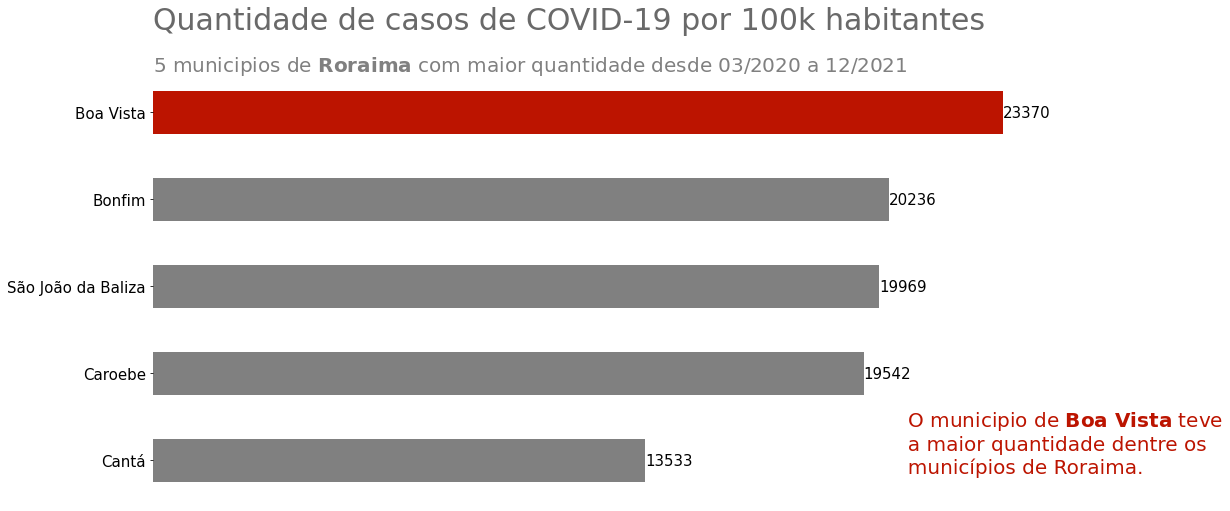

In [ ]:
grafico_municipio_roraima()

### <font color= MediumSpringGreen> 3. Previsão com o Prophet

Irei visualizar os dados de previsão realizado com o Prophet

In [ ]:
#Gerando o modelo com change point com melhor ajuste (vide "mean_absolute_error"), feriados listados e sazonalidade multiplicativa.
modelo_feriados = Prophet(changepoint_prior_scale=10.0,holidays=feriados_RR,seasonality_mode='multiplicative')

modelo_feriados.fit(sem_outliers)                                               #Ajustar ao DF de treino
dataframefuturo = modelo_feriados.make_future_dataframe(periods=60)             #Gerar o dataframe futuro
previsao = modelo_feriados.predict(dataframefuturo)                             #Criar o DF da previsao

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df_teste['ds'] = pd.to_datetime(df_teste['ds'])                                 #Modificar a coluna ds para Datetime

In [37]:
def grafico_previsao_prophet():
  modelo_feriados.plot(previsao, figsize=(15,7));                                 #Criar o gráfico com dados de treino
  plt.plot(df_teste['ds'],df_teste['y'],'.r');                                    #Criar o gráfico com dados de teste

  plt.xlabel(None)                                                                #Excluir rótulo do eixo x
  plt.ylabel('Novos casos')                                                       #Modificar rótulo do eixo y

  plt.xticks(rotation=30)                                                         #Rotacionar o valor do eixo x
  plt.xlim([datetime.date(2020, 3, 21), datetime.date(2022, 1, 18)])              #Formatar o limite do eixo x


  plt.legend(labels= ['Dados treino', 'Previsão', 'Dados de teste'],              #Criar legenda para os dados
            loc="upper right")                                                   #Modificar a localização da legenda
                                                                    

  plt.title('Previsão de novos casos de Covid-19 em Boa Vista-RR' + '\n',               #Colocar o título
              fontsize=25,                                                        #Tamanho do texto
              loc='left',                                                         #Ajustar do lado esquerdo
              color='dimgrey')                                                    #Escolher a cor
  plt.show()

### <font color= MediumSpringGreen> 3.1 Visualização

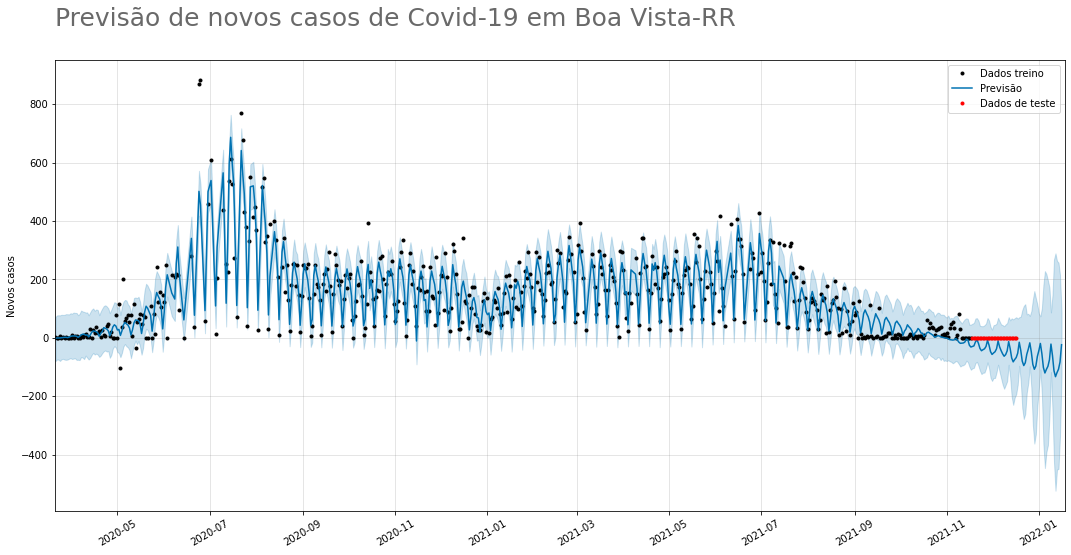

In [38]:
grafico_previsao_prophet()

### <font color= MediumSpringGreen> 4 Considerações finais

Quais são os números previstos para os próximos 30 dias no município selecionado?


O projeto pode responder os questionamentos iniciais propostos, através da exploração e visualização dos dados.

O estado com o maior índice de casos por habitante desde o início da pandemia (atualmente) é **Roraima**.

Mas nenhum dos 10 municípios com maior índice por habitante são deste estado, mas sim de Goiás, Amazonas, Rio Grande do Norte, Pará, Rio Grande do Sul, Paraná e Santa Catarina.

Dentre o estado de **Roraima** o município com o maior índice de casos por habitante foi o de **Boa Vista**, capital do estado.

Com o auxílio da biblioteca do Facebook Prophet, podemos observar que seja de 0 o número de novos casos de Covid-19 no município, no próximo mês. 
Entretanto, devemos entender que a ferramenta tomou como base os últimos dados para realizar a previsão e informações incerta como a nova variante [Omicron](https://www.who.int/news/item/28-11-2021-update-on-omicron) não foram colocadas dentro da previsão.

Com o aumento da cobertura vacinal da população, podemos ter uma previsão de menores quantidade de casos. 

Mas é importante lembrarmos que a pandemia não acabou e devemos continuar nos prevenindo ao máximo com todas as medidas de segurança para que não haja novos casos. 